# 연습문제(2) 풀이

## 작업준비

In [7]:
from pca import pca
from pandas import read_excel, DataFrame, merge, melt
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler

import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd()))))
from helper import myOls, getBestFeatures, scalling

## 문제 1

### 데이터 가져오기

In [8]:
df = read_excel("https://data.hossam.kr/E04/diabetes.xlsx")
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220


### 데이터 표준화

#### 독립변수에 대한 표준화

In [9]:
x_train = df.drop(['target'], axis=1)
x_train_std = StandardScaler().fit_transform(x_train)
x_train_std_df = DataFrame(x_train_std, columns=x_train.columns)
x_train_std_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568
...,...,...,...,...,...,...,...,...,...,...
437,0.876870,1.065488,0.413360,1.256040,-0.119769,-0.053957,-0.602843,-0.054499,0.655787,0.151508
438,-0.115937,1.065488,-0.334410,-1.422086,1.037341,1.664355,-0.602843,0.721302,-0.380819,0.935254
439,0.876870,1.065488,-0.334410,0.363573,-0.785107,-0.290965,-0.525441,-0.232934,-0.985649,0.325674
440,-0.956004,-0.938537,0.821235,0.025550,0.343075,0.321306,-0.602843,0.558384,0.936163,-0.545154


#### 종속변수에 대한 표준화

In [10]:
y_train = df.filter(['target'], axis=1)
y_train_std = StandardScaler().fit_transform(y_train)
y_train_std_df = DataFrame(y_train_std, columns=y_train.columns)
y_train_std_df

,target
0,-0.014719
1,-1.001659
2,-0.144580
3,0.699513
4,-0.222496
...,...
437,0.335904
438,-0.625064
439,-0.261454
440,0.881318


### 전체 요인에 대한 회귀분석

In [11]:
mdf = merge(x_train_std_df, y_train_std_df, left_index=True, right_index=True)

xnames = list(x_train_std_df.columns)

model1 = myOls(mdf, y='target', x=xnames)
model1.summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Mon, 07 Aug 2023   Prob (F-statistic):           3.83e-62
Time:                        17:15:56   Log-Likelihood:                -466.00
No. Observations:                 442   AIC:                             954.0
Df Residuals:                     431   BIC:                             999.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.671e-16      0.033  -4.99e-15      1.000      -0.066       0.066
age           -0.0062      0.037     -0.168      0.867      -0.079       0.066
sex           -0.1481      0.038     -3.917      0.000      -0.222      -0.074
bmi            0.3211      0.041      7.813      0.000       0.240       0.402
bp             0.2004      0.040      4.958      0.000       0.121       0.280
s1            -0.4893      0.257     -1.901      0.058      -0.995       0.017
s2             0.2945      0.209      1.406      0.160      -0.117       0.706
s3             0.0624      0.131      0.475      0.635      -0.196       0.320
s4             0.1094      0.100      1.097      0.273      -0.087       0.305
s5             0.4640      0.106      4.370      0.000       0.255       0.673
s6             0.0418      0.041      1.025      0.306      -0.038       0.122
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 결과표

In [12]:
model1.table

B   표준오차  β        t   유의확률        VIF
종속변수   독립변수                                              
target age   -0.0062  0.037  0  -0.168*  0.867   1.217386
       sex   -0.1481  0.038  0  -3.917*  0.000   1.323571
       bmi    0.3211  0.041  0   7.813*  0.000   1.723237
       bp     0.2004  0.040  0   4.958*  0.000   1.542677
       s1    -0.4893  0.257  0  -1.901*  0.058  59.698989
       s2     0.2945  0.209  0   1.406*  0.160  39.373182
       s3     0.0624  0.131  0   0.475*  0.635  15.410233
       s4     0.1094  0.100  0   1.097*  0.273   8.915790
       s5     0.4640  0.106  0   4.370*  0.000  10.522501
       s6     0.0418  0.041  0   1.025*  0.306   1.488241

### 차원 축소 적용

#### PCA 분석

In [13]:
pca_model = pca()
fit = pca_model.fit_transform(x_train_std_df)
topfit = fit['topfeat']
topfit

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [10] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [8] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [10] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[8]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


,PC,feature,loading,type
0,PC1,s4,0.428834,best
1,PC2,s1,0.573027,best
2,PC3,bp,0.513571,best
3,PC4,sex,-0.679860,best
4,PC5,age,-0.686876,best
5,PC6,s6,0.805066,best
6,PC7,s5,0.647302,best
7,PC8,bp,-0.477360,best
8,PC7,bmi,-0.519874,weak
9,PC2,s2,0.455942,weak


#### 선정된 요인 이름 추출

In [14]:
best = topfit.query("type=='best'")
feature = list(set(list(best['feature'])))
feature

['bp', 's1', 'sex', 's4', 'age', 's5', 's6']

#### 선정된 요인을 사용하여 회귀분석 수행

In [15]:
mdf = merge(x_train_std_df, y_train_std_df, left_index=True, right_index=True)
model2 = myOls(mdf, y='target', x=feature)
model2.summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     48.44
Date:                Mon, 07 Aug 2023   Prob (F-statistic):           1.06e-50
Time:                        17:15:57   Log-Likelihood:                -499.57
No. Observations:                 442   AIC:                             1015.
Df Residuals:                     434   BIC:                             1048.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.671e-16      0.036  -4.65e-15      1.000      -0.071       0.071
bp             0.2823      0.042      6.709      0.000       0.200       0.365
s1            -0.2216      0.046     -4.834      0.000      -0.312      -0.132
sex           -0.1796      0.040     -4.487      0.000      -0.258      -0.101
s4             0.2546      0.052      4.867      0.000       0.152       0.357
age           -0.0053      0.040     -0.135      0.893      -0.083       0.073
s5             0.3970      0.051      7.795      0.000       0.297       0.497
s6             0.0927      0.043      2.142      0.033       0.008       0.178
==============================================================================
Omnibus:                        2.903   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.234   Jarque-Bera (JB):                2.906
Skew:                           0.162   Prob(JB):                        0.234
Kurtosis:                       2.771   Cond. No.                         3.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 두 가지 모델의 결과 비교

#### 결과 비교를 위한 데이터프레임 생성

In [16]:
rdf = DataFrame({
    's6': mdf['s6'],
    'y': mdf['target'],
    'y1': model1.fit.predict(x_train_std_df),
    'y2': model2.fit.predict(x_train_std_df)
})

rdf

,s6,y,y1,y2
0,-0.370989,-0.014719,0.701028,0.258085
1,-1.938479,-1.001659,-1.091639,-0.909635
2,-0.545154,-0.144580,0.321396,-0.062681
3,-0.196823,0.699513,0.191946,0.259033
4,-0.980568,-0.222496,-0.307396,-0.092375
...,...,...,...,...
437,0.151508,0.335904,0.530922,0.445548
438,0.935254,-0.625064,-0.663297,-0.702843
439,0.325674,-0.261454,-0.401357,-0.339855
440,-0.545154,0.881318,0.775597,0.568153


#### 실제 값과 model1의 예측 결과를 재배치

In [17]:
mdf1 = melt(rdf, id_vars=['s6'], value_vars=['y', 'y1'])
mdf1

,s6,variable,value
0,-0.370989,y,-0.014719
1,-1.938479,y,-1.001659
2,-0.545154,y,-0.144580
3,-0.196823,y,0.699513
4,-0.980568,y,-0.222496
...,...,...,...
879,0.151508,y1,0.530922
880,0.935254,y1,-0.663297
881,0.325674,y1,-0.401357
882,-0.545154,y1,0.775597


#### 실제 값과 model2의 예측 결과 재배치

In [18]:
mdf2 = melt(rdf, id_vars=['s6'], value_vars=['y', 'y2'])
mdf2

,s6,variable,value
0,-0.370989,y,-0.014719
1,-1.938479,y,-1.001659
2,-0.545154,y,-0.144580
3,-0.196823,y,0.699513
4,-0.980568,y,-0.222496
...,...,...,...
879,0.151508,y2,0.445548
880,0.935254,y2,-0.702843
881,0.325674,y2,-0.339855
882,-0.545154,y2,0.568153


#### 각각의 재배치 결과를 시각화

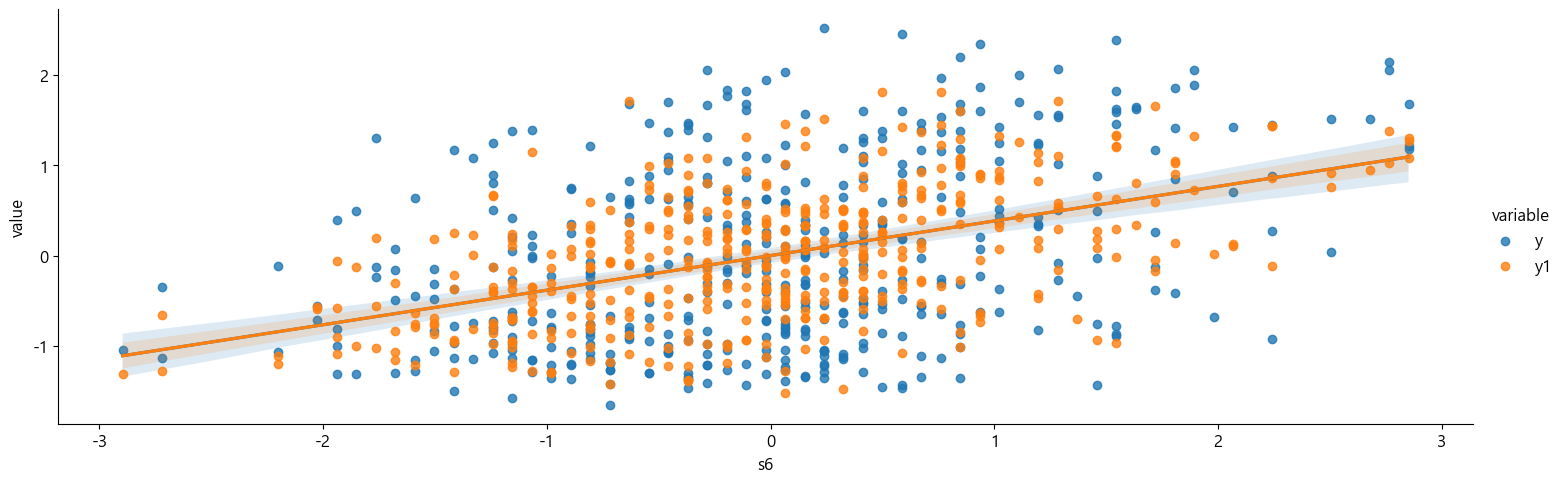

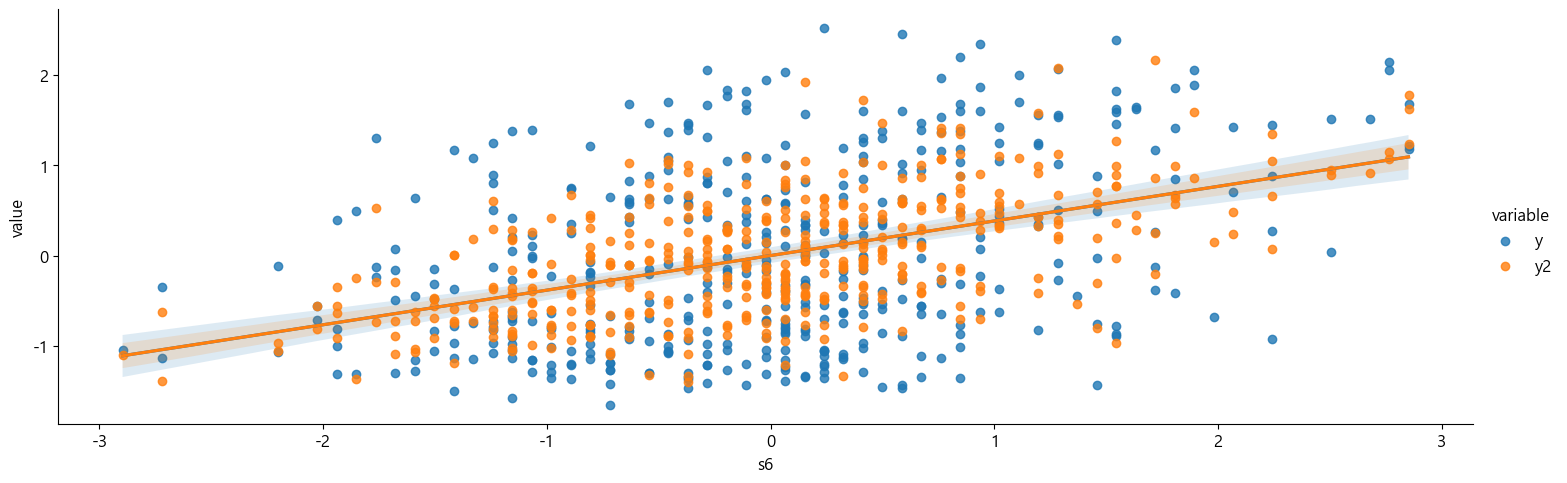

In [19]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["axes.unicode_minus"] = False

sb.lmplot(data=mdf1, x="s6", y="value", hue="variable", height=5, aspect=3)
sb.lmplot(data=mdf2, x="s6", y="value", hue="variable", height=5, aspect=3)

plt.show()
plt.close()

## 문제 2

### 데이터 가져오기

In [20]:
df = read_excel("https://data.hossam.kr/E04/manhattan.xlsx")
df

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,4210,1.0,1,532,3,8.0,16,1,1,1,1,1,1,0,1,Chelsea,Manhattan
3535,6675,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1,Tribeca,Manhattan
3536,1699,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0,Little Italy,Manhattan
3537,3475,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1,Midtown West,Manhattan


### 데이터 전처리

#### 명목형 변수 확인

값의 종류가 지나치게 많으므로 이 변수는 제외하기로 함

In [21]:
df['neighborhood'].value_counts()

neighborhood
Upper West Side        579
Upper East Side        500
Midtown East           460
Midtown West           314
Financial District     268
Chelsea                182
Flatiron               132
Midtown                119
Tribeca                119
East Village           108
Battery Park City      104
Midtown South           85
Central Harlem          82
West Village            67
Greenwich Village       66
Gramercy Park           61
Soho                    58
Washington Heights      54
East Harlem             41
Lower East Side         41
Central Park South      23
Hamilton Heights        16
Morningside Heights     13
Inwood                  12
Nolita                   9
Chinatown                8
Roosevelt Island         5
Long Island City         4
Stuyvesant Town/PCV      3
Little Italy             3
West Harlem              2
Manhattanville           1
Name: count, dtype: int64

값의 종류가 없으므로 이 변수도 제외하기로 함

In [22]:
df['borough'].value_counts()

borough
Manhattan    3539
Name: count, dtype: int64

#### 불필요한 변수를 제거

In [23]:
df2 = df.drop(['neighborhood', 'borough'], axis=1)
df2.head()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
0,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1
1,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0
2,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0
3,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1
4,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1


#### 데이터 표준화

In [24]:
x_train_std_df, y_train_std_df = scalling(df2, 'rent')

In [25]:
x_train_std_df.head()

,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
0,-1.397410,-0.611790,-0.962011,0.730862,-0.904097,-0.888763,1.21585,2.336243,-0.436784,-0.625393,1.546964,2.094423,-0.241482,2.171931
1,0.669863,1.056257,2.218694,-0.176116,-0.995343,1.117593,-0.82247,-0.428038,-0.436784,-0.625393,-0.646428,-0.477459,-0.241482,-0.460420
2,-0.363774,-0.611790,-0.049651,-0.538908,3.566974,-0.584000,-0.82247,2.336243,-0.436784,1.598995,1.546964,2.094423,-0.241482,-0.460420
3,-0.363774,-0.611790,0.073811,-0.357512,-0.356619,-0.533206,-0.82247,-0.428038,-0.436784,1.598995,1.546964,2.094423,-0.241482,2.171931
4,0.669863,1.056257,8.077886,-0.357512,-0.721604,2.133470,-0.82247,-0.428038,-0.436784,1.598995,1.546964,2.094423,-0.241482,2.171931


In [26]:
y_train_std_df.head()

,rent
0,-0.818669
1,2.011480
2,-0.202044
3,-0.108760
4,3.908786


### PCA

#### 주성분 분석 시행

In [28]:
feature, topfeat_df = getBestFeatures(x_train_std_df)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [14] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [12] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [14] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[12]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [29]:
topfeat_df

,PC,feature,loading,type
0,PC1,has_elevator,0.453207,best
1,PC2,size_sqft,0.573482,best
2,PC3,building_age_yrs,-0.638744,best
3,PC4,has_patio,0.743626,best
4,PC5,min_to_subway,0.624977,best
5,PC6,min_to_subway,0.672089,best
6,PC7,no_fee,0.666304,best
7,PC8,building_age_yrs,0.673353,best
8,PC9,has_roofdeck,0.801673,best
9,PC10,has_dishwasher,-0.650467,best


In [31]:
feature

['has_dishwasher',
 'has_gym',
 'building_age_yrs',
 'has_roofdeck',
 'size_sqft',
 'no_fee',
 'has_patio',
 'has_elevator',
 'min_to_subway']

In [32]:
mdf = merge(x_train_std_df, y_train_std_df, left_index=True, right_index=True)
ols_result = myOls(mdf, y='rent', x=feature)
ols_result.summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     1221.
Date:                Mon, 07 Aug 2023   Prob (F-statistic):               0.00
Time:                        17:16:26   Log-Likelihood:                -2519.3
No. Observations:                3539   AIC:                             5059.
Df Residuals:                    3529   BIC:                             5120.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -9.346e-17      0.008  -1.13e-14      1.000      -0.016       0.016
has_dishwasher       0.0008      0.009      0.088      0.930      -0.017       0.019
has_gym          -3.013e-05      0.012     -0.003      0.998      -0.023       0.023
building_age_yrs    -0.1476      0.009    -16.969      0.000      -0.165      -0.131
has_roofdeck         0.0040      0.010      0.383      0.701      -0.016       0.024
size_sqft            0.8594      0.008    102.273      0.000       0.843       0.876
no_fee              -0.0095      0.009     -1.086      0.278      -0.027       0.008
has_patio            0.0015      0.008      0.180      0.857      -0.015       0.018
has_elevator         0.0036      0.012      0.310      0.756      -0.019       0.026
min_to_subway       -0.0251      0.008     -2.970      0.003      -0.042      -0.009
==============================================================================
Omnibus:                      885.741   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11081.768
Skew:                           0.831   Prob(JB):                         0.00
Kurtosis:                      11.508   Cond. No.                         2.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 실제 임대료와 예측된 임대료 비교

In [33]:
rdf = DataFrame({
    'x': mdf['building_age_yrs'],
    'rent': mdf['rent'],
    'y': ols_result.fit.predict(x_train_std_df)
})

rdf

,x,rent,y
0,-0.888763,-0.818669,-0.709297
1,1.117593,2.011480,1.749272
2,-0.584000,-0.202044,0.081194
3,-0.533206,-0.108760,0.164098
4,2.133470,3.908786,6.649321
...,...,...,...
3534,-0.914160,-0.293747,-0.584661
3535,-1.091938,0.485729,0.252526
3536,1.117593,-1.087770,-1.388796
3537,-0.964953,-0.526167,-0.387902


In [34]:
melt_df = melt(rdf, id_vars=['x'], value_vars=['rent','y'])
melt_df

,x,variable,value
0,-0.888763,rent,-0.818669
1,1.117593,rent,2.011480
2,-0.584000,rent,-0.202044
3,-0.533206,rent,-0.108760
4,2.133470,rent,3.908786
...,...,...,...
7073,-0.914160,y,-0.584661
7074,-1.091938,y,0.252526
7075,1.117593,y,-1.388796
7076,-0.964953,y,-0.387902


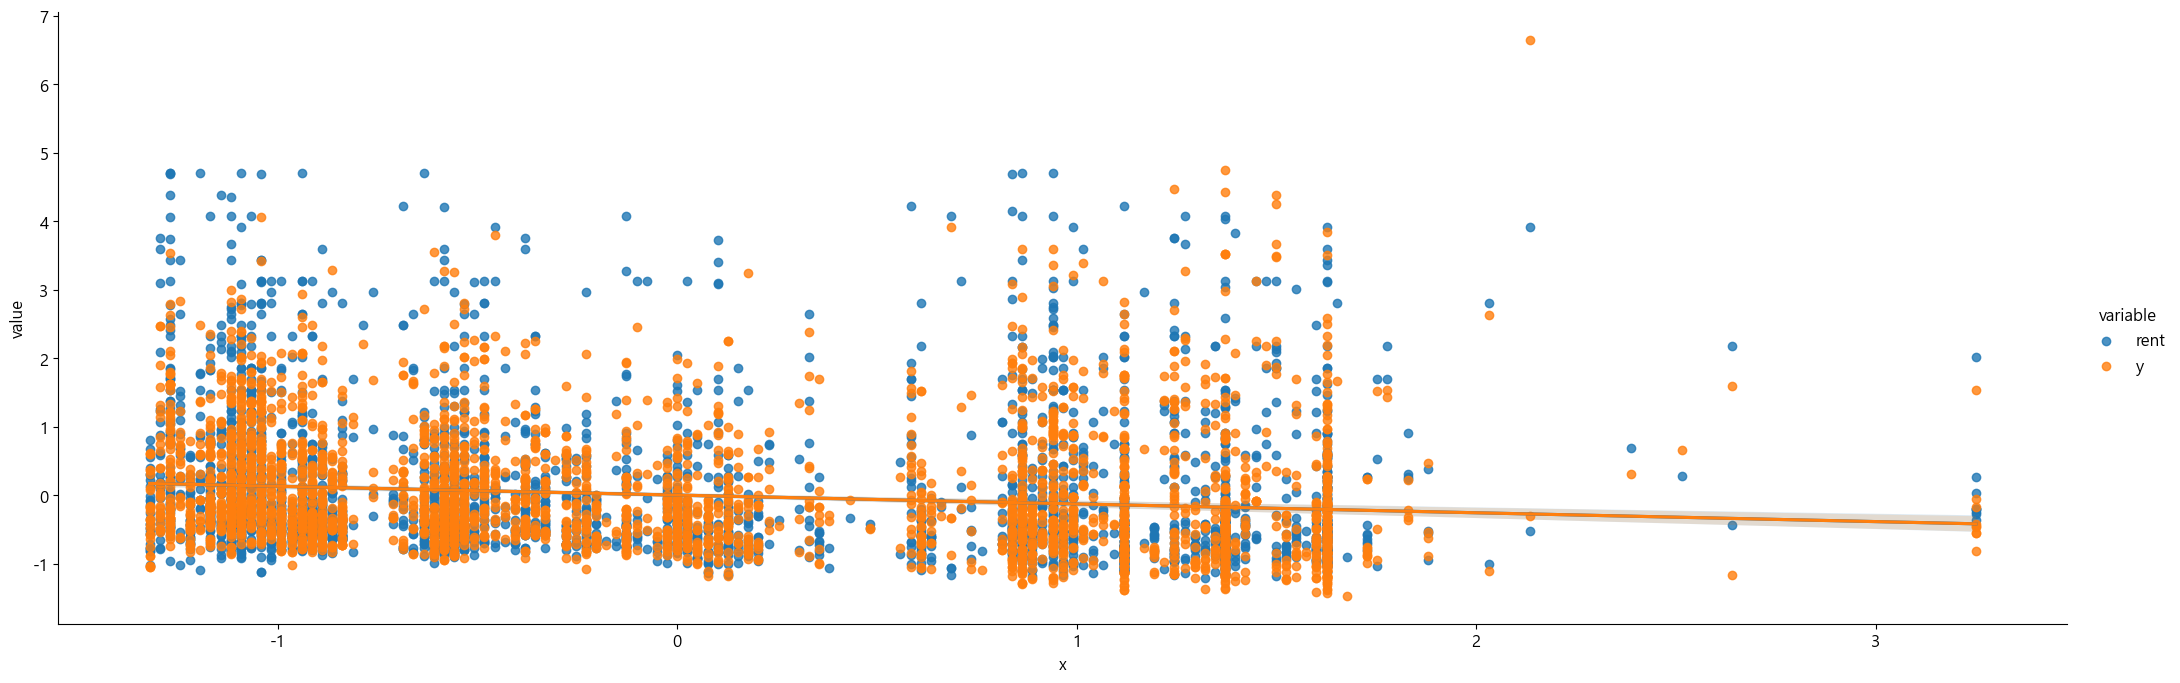

In [35]:
sb.lmplot(data=melt_df, x="x", y="value", hue="variable", height=7, aspect=3)
plt.show()
plt.close()